Libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets
from ipywidgets import interact


Read in files

In [5]:
dir = '/content/drive/MyDrive/ServiceProjects-public/CivilRightCenter-RJC/Data Cleanup team/HMDA CSVs'
#array of data frames
df = []

def readInFile(file):
  df.append(pd.read_csv(file))


for file in os.listdir(dir):
  if file.endswith(".csv"):
    readInFile(dir + '/' + file)
    print(file)


<ipython-input-5-be24270260d0>:6: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file))


hmda_2007_in_all-records_labels.csv


<ipython-input-5-be24270260d0>:6: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file))


hmda_2008_in_all-records_labels.csv


<ipython-input-5-be24270260d0>:6: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file))


hmda_2009_in_all-records_labels.csv


<ipython-input-5-be24270260d0>:6: DtypeWarning: Columns (34,36,38,42,44,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file))


hmda_2010_in_all-records_labels.csv


<ipython-input-5-be24270260d0>:6: DtypeWarning: Columns (34,36,38,42,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file))


hmda_2011_in_all-records_labels.csv


<ipython-input-5-be24270260d0>:6: DtypeWarning: Columns (34,36,38,42,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file))


hmda_2012_in_all-records_labels.csv


<ipython-input-5-be24270260d0>:6: DtypeWarning: Columns (32,34,36,38,42,44,46,48,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file))


hmda_2013_in_all-records_labels 2.csv


<ipython-input-5-be24270260d0>:6: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file))


hmda_2014_in_all-records_labels.csv


<ipython-input-5-be24270260d0>:6: DtypeWarning: Columns (34,36,38,42,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file))


hmda_2015_in_all-records_labels.csv


<ipython-input-5-be24270260d0>:6: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file))


hmda_2016_in_all-records_labels.csv


<ipython-input-5-be24270260d0>:6: DtypeWarning: Columns (34,36,38,44,46,48,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file))


hmda_2017_in_all-records_labels.csv


Combine dataframes

In [6]:
concatenated_df = pd.concat(df, ignore_index=True)

Filter

In [14]:
filtered_df = concatenated_df[(concatenated_df['msamd'] == 43780) & (concatenated_df['state_code'] == 18)]
#only selects specific columns
selected_columns = filtered_df[['as_of_year', 'agency_name', 'agency_abbr', 'loan_type_name', 'loan_type', 'property_type_name', 'property_type', 'loan_purpose_name', 'loan_purpose_name', 'owner_occupancy_name', 'owner_occupancy', 'loan_amount_000s', 'preapproval_name', 'preapproval', 'action_taken_name', 'action_taken', 'msamd_name', 'msamd', 'state_name', 'state_abbr', 'state_code', 'county_name', 'county_code', 'census_tract_number', 'applicant_ethnicity_name', 'applicant_ethnicity', 'co_applicant_ethnicity_name', 'co_applicant_ethnicity', 'applicant_race_name_1', 'applicant_race_1', 'co_applicant_race_name_1', 'co_applicant_race_1', 'applicant_sex_name', 'applicant_sex', 'co_applicant_sex_name', 'co_applicant_sex', 'applicant_income_000s', 'purchaser_type_name', 'purchaser_type', 'denial_reason_name_1', 'denial_reason_1', 'denial_reason_name_2', 'denial_reason_2', 'denial_reason_name_3', 'denial_reason_name_3', 'hoepa_status_name', 'hoepa_status', 'lien_status_name', 'lien_status', 'population', 'minority_population', 'hud_median_family_income', 'tract_to_msamd_income', 'number_of_owner_occupied_units', 'number_of_1_to_4_family_units']]
# Filter the data for White and African American / Black races
#filtered_race_df = selected_columns[selected_columns['applicant_race_1'].isin(['White', 'Black or African American'])]



Checking to make sure everything looks good

#Vizualizations

applicant_race_name_1
Black or African American    57.507244
White                        77.411923
Name: applicant_income_000s, dtype: float64


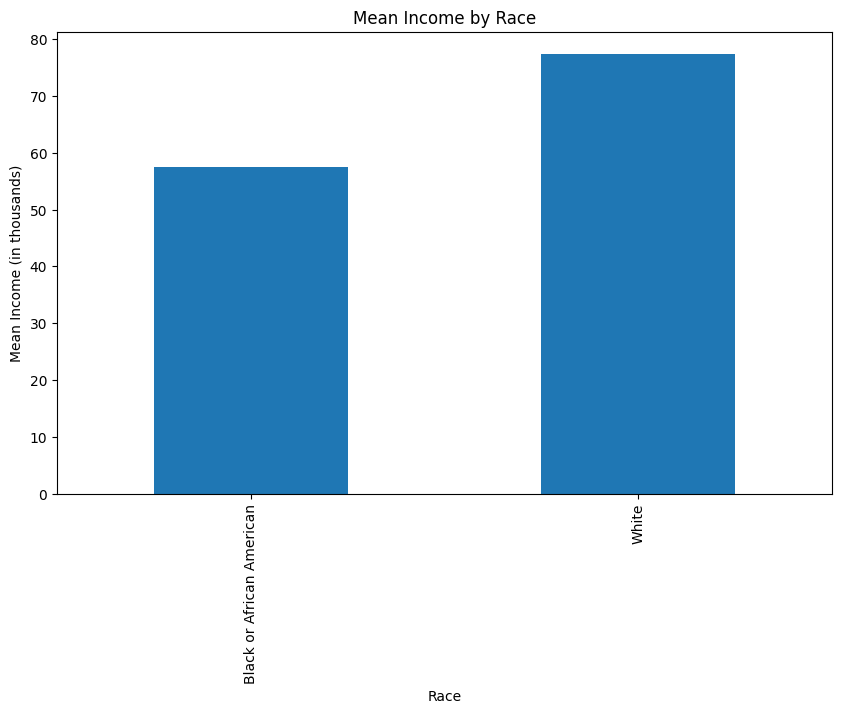

In [15]:
# prompt: create visualizations representing the cross between race and income

import seaborn as sns

# Filter the data for White and African American / Black races and remove NaN values in income
filtered_race_df = selected_columns[selected_columns['applicant_race_name_1'].isin(['White', 'Black or African American'])]
filtered_race_df = filtered_race_df.dropna(subset=['applicant_income_000s'])


# Calculate the mean income for each race
mean_income_by_race = filtered_race_df.groupby('applicant_race_name_1')['applicant_income_000s'].mean()
print(mean_income_by_race)

# Create a bar plot of the mean income for each race
plt.figure(figsize=(10, 6))
mean_income_by_race.plot(kind='bar')
plt.title('Mean Income by Race')
plt.xlabel('Race')
plt.ylabel('Mean Income (in thousands)')
plt.show()

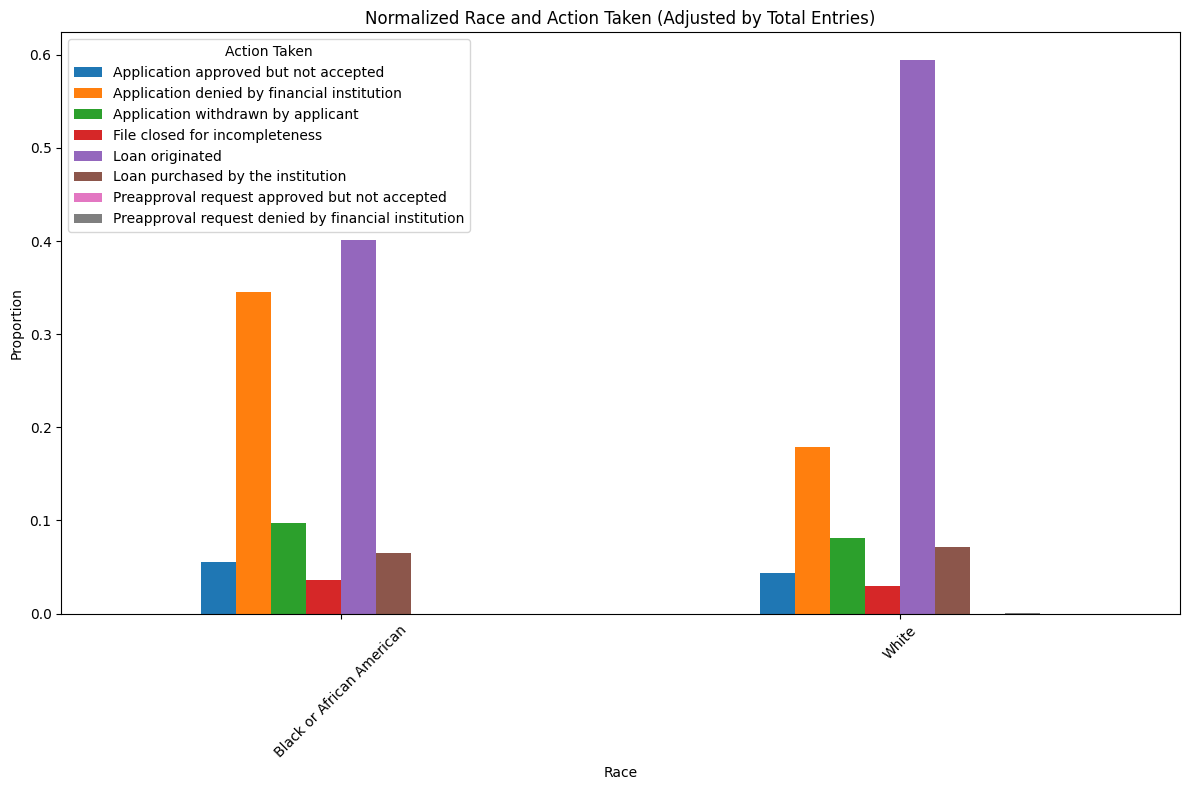

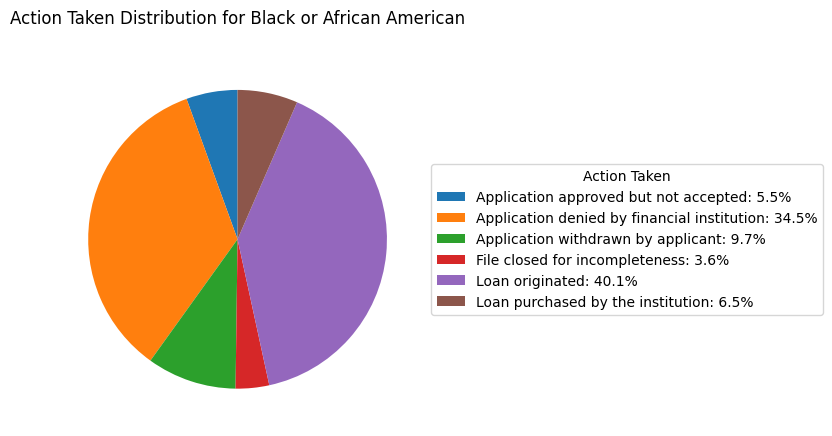

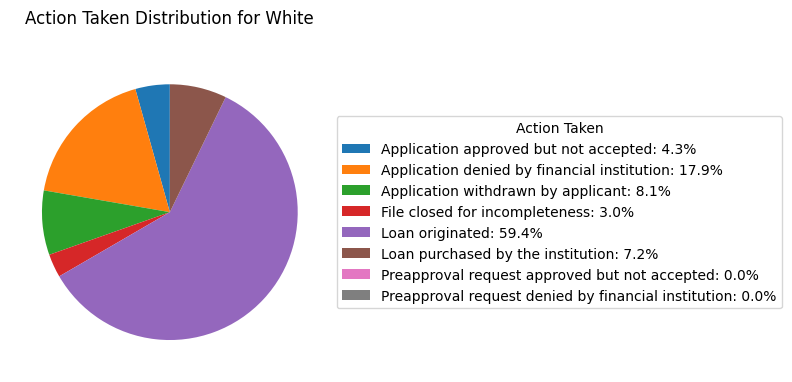

In [32]:
# prompt: create visualizations representing the cross between race and action taken
import pandas as pd # Import pandas for creating the crosstab

# Calculate total entries for each racial group
total_entries_by_race = filtered_race_df['applicant_race_name_1'].value_counts()

# Create the cross-tabulation of race and action taken using pd.crosstab
action_taken_cross_tab = pd.crosstab(filtered_race_df['applicant_race_name_1'],
                                     filtered_race_df['action_taken_name'])

# Normalize the cross-tabulation by the total entries for each race
action_taken_cross_tab_normalized = action_taken_cross_tab.div(total_entries_by_race, axis=0)

# Visualize normalized data using a bar plot
action_taken_cross_tab_normalized.plot(kind='bar', figsize=(12, 8))
plt.title('Normalized Race and Action Taken (Adjusted by Total Entries)')
plt.xlabel('Race')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Action Taken')
plt.tight_layout()
plt.show()

# Generate pie charts for each racial group
for race in action_taken_cross_tab_normalized.index:
    race_action_proportions = action_taken_cross_tab_normalized.loc[race]

    # Filter out 0% proportions to avoid clutter in the pie chart ONLY
    race_action_proportions_pie = race_action_proportions[race_action_proportions > 0]

    # Create a pie chart with a legend
    plt.figure(figsize=(8, 8))

    # Plot the pie chart with empty labels and set colors using a colormap
    # Use race_action_proportions_pie for plotting, but race_action_proportions for the legend
    wedges, texts, autotexts = plt.pie(race_action_proportions_pie,
                                      autopct='',  # Remove percentage labels from pie chart
                                      startangle=90,
                                       labels=[''] * len(race_action_proportions_pie))

    # Create a legend with labels and percentages, including 0.0% entries
    legend_labels = [f'{action_taken}: {percentage:.1f}%' for action_taken, percentage in
                     zip(race_action_proportions.index, race_action_proportions.values * 100)]

    plt.legend(wedges,  # Use all wedges for the legend (including those with 0% if present)
               legend_labels,
               title="Action Taken", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.title(f'Action Taken Distribution for {race}\n', fontsize=12)
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

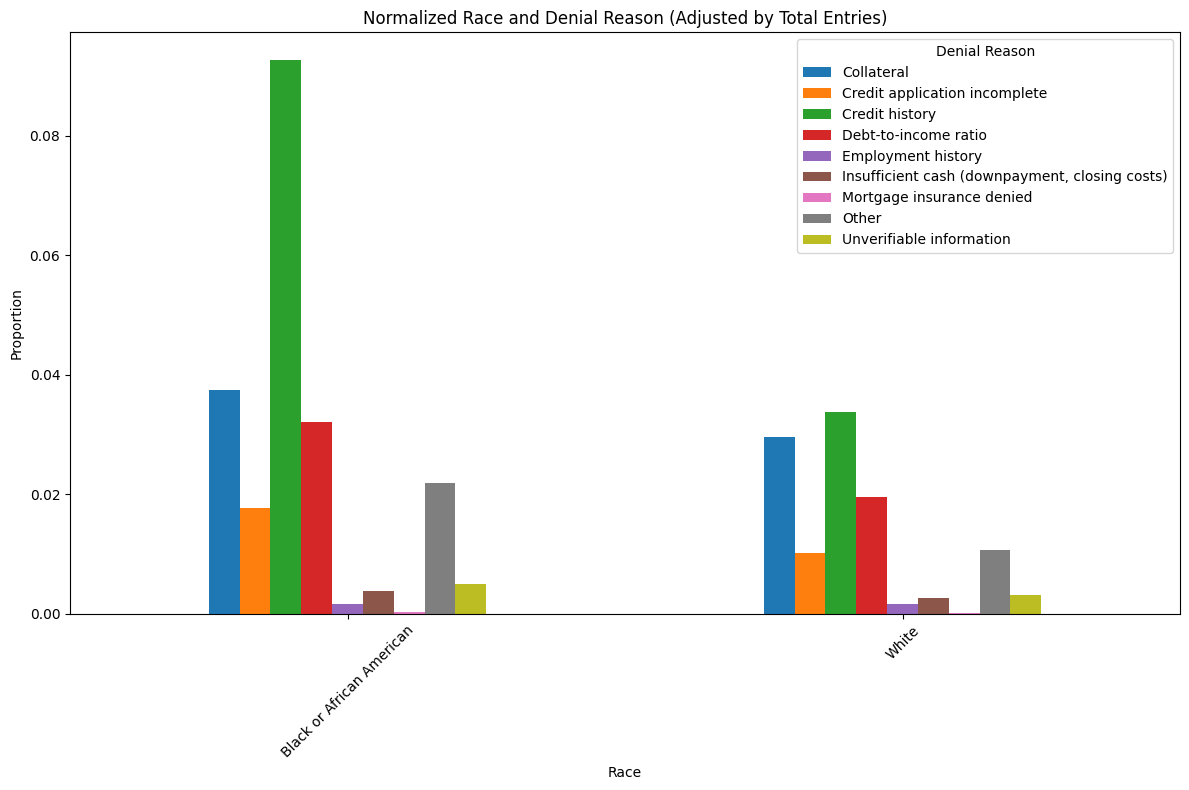

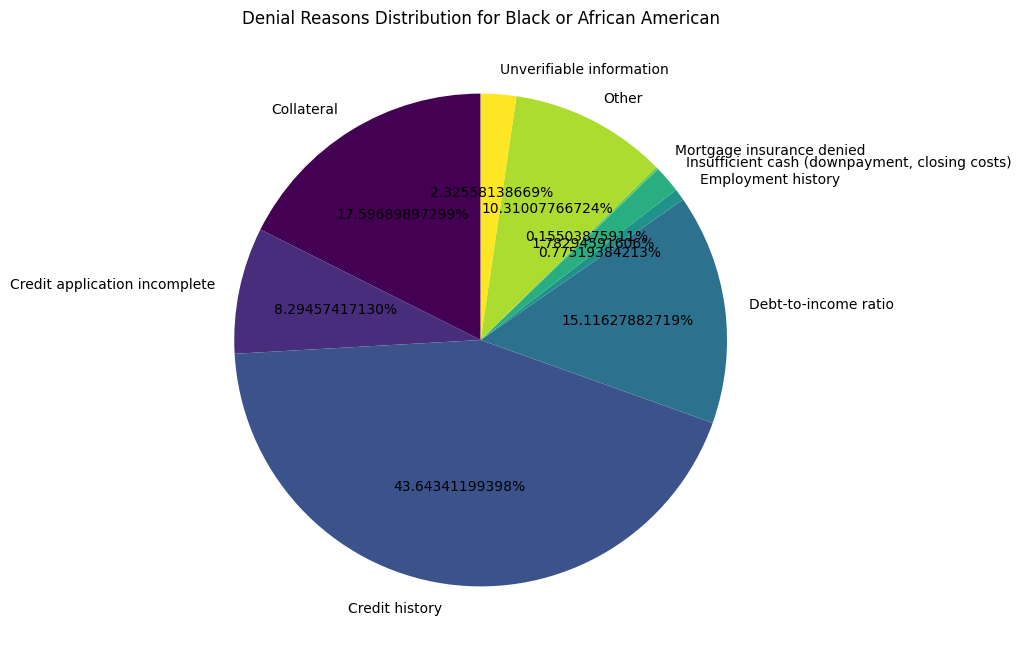

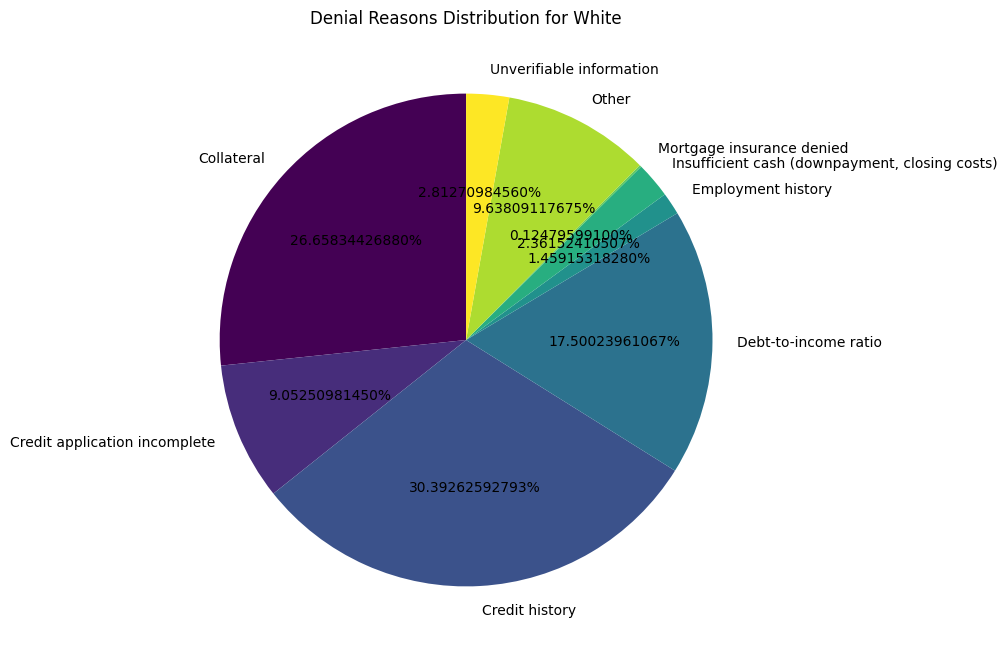

In [17]:
# prompt: create visualizations representing the cross between race and action taken

# Calculate total entries for each racial group
total_entries_by_race = filtered_race_df['applicant_race_name_1'].value_counts()

# Normalize the cross-tabulation by the total entries for each race
denial_cross_tab = pd.crosstab(filtered_race_df['applicant_race_name_1'],
                               filtered_race_df['denial_reason_name_1'])
denial_cross_tab_normalized = denial_cross_tab.div(total_entries_by_race, axis=0)

# Visualize normalized data using a heatmap
#plt.figure(figsize=(12, 8))
##sns.heatmap(denial_cross_tab_normalized, annot=True, fmt='.4f', cmap='viridis')
#plt.title('Normalized Cross-tabulation of Race and Denial Reason (Adjusted by Total Entries)')

#plt.xlabel('Denial Reason')
#plt.ylabel('Race')
#plt.show()

# Visualize normalized data using a bar plot
denial_cross_tab_normalized.plot(kind='bar', figsize=(12, 8))
plt.title('Normalized Race and Denial Reason (Adjusted by Total Entries)')
plt.xlabel('Race')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Denial Reason')
plt.tight_layout()
plt.show()

# Generate pie charts for each racial group
for race in denial_cross_tab_normalized.index:
    race_denial_proportions = denial_cross_tab_normalized.loc[race]

    # Create a pie chart
    plt.figure(figsize=(8, 8))
    race_denial_proportions.plot(kind='pie', autopct='%1.11f%%', startangle=90, cmap='viridis', legend=False)
    plt.title(f'Denial Reasons Distribution for {race}')
    plt.ylabel('')  # Remove y-axis label for better visualization
    plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-20-5e1d6c9e9363>:19: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file))


hmda_2007_in_all-records_labels.csv


<ipython-input-20-5e1d6c9e9363>:19: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file))


hmda_2008_in_all-records_labels.csv


<ipython-input-20-5e1d6c9e9363>:19: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file))


hmda_2009_in_all-records_labels.csv


<ipython-input-20-5e1d6c9e9363>:19: DtypeWarning: Columns (34,36,38,42,44,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file))


hmda_2010_in_all-records_labels.csv


<ipython-input-20-5e1d6c9e9363>:19: DtypeWarning: Columns (34,36,38,42,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file))


hmda_2011_in_all-records_labels.csv


<ipython-input-20-5e1d6c9e9363>:19: DtypeWarning: Columns (34,36,38,42,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file))


hmda_2012_in_all-records_labels.csv


<ipython-input-20-5e1d6c9e9363>:19: DtypeWarning: Columns (32,34,36,38,42,44,46,48,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file))


hmda_2013_in_all-records_labels 2.csv


<ipython-input-20-5e1d6c9e9363>:19: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file))


hmda_2014_in_all-records_labels.csv


<ipython-input-20-5e1d6c9e9363>:19: DtypeWarning: Columns (34,36,38,42,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file))


hmda_2015_in_all-records_labels.csv


<ipython-input-20-5e1d6c9e9363>:19: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file))


hmda_2016_in_all-records_labels.csv


<ipython-input-20-5e1d6c9e9363>:19: DtypeWarning: Columns (34,36,38,44,46,48,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file))


hmda_2017_in_all-records_labels.csv


interactive(children=(IntSlider(value=2007, description='Start Year:', max=2017, min=2007), IntSlider(value=20…

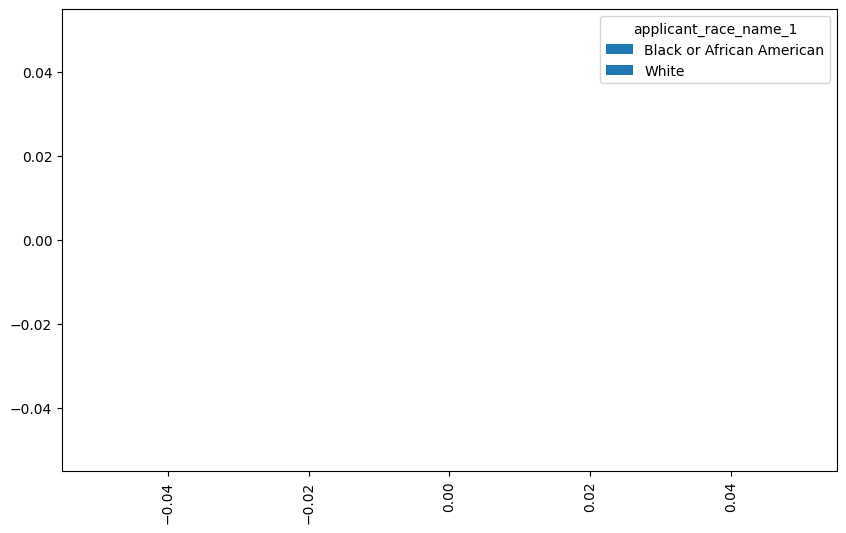

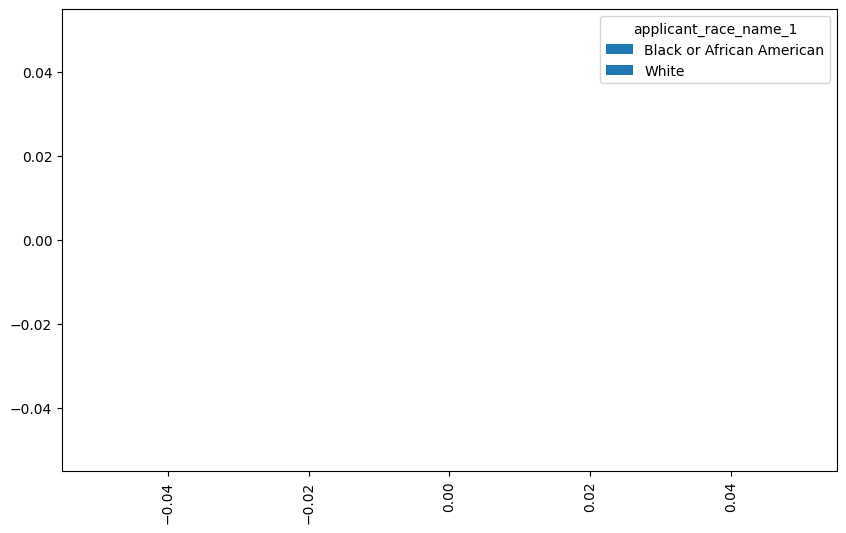

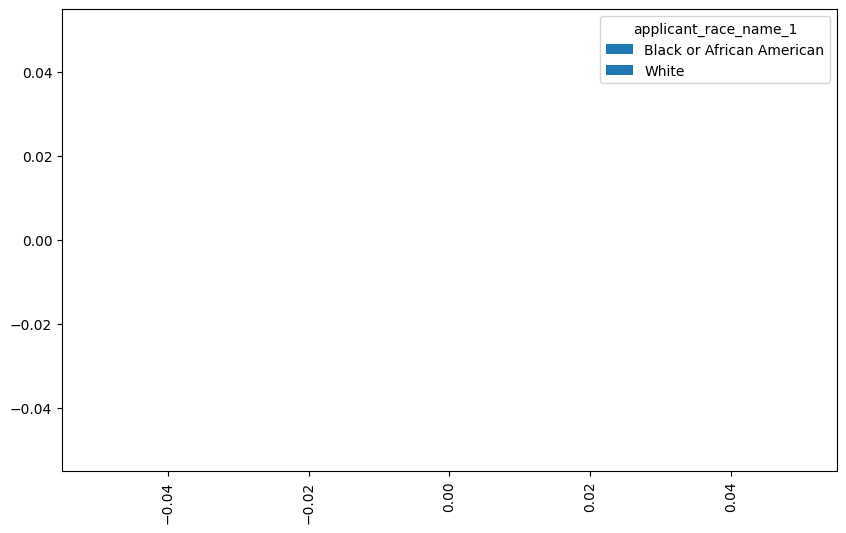

In [ ]:
# prompt: make an interactive graph to show populations of white and black applicants per year for loans keep the y axis stable

from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets
from ipywidgets import interact
import seaborn as sns

# Mount Google Drive
drive.mount('/content/drive')

# Read in files
dir = '/content/drive/MyDrive/ServiceProjects-public/CivilRightCenter-RJC/Data Cleanup team/HMDA CSVs'
df = []

def readInFile(file):
  df.append(pd.read_csv(file))

for file in os.listdir(dir):
  if file.endswith(".csv"):
    readInFile(dir + '/' + file)
    print(file)

# Combine dataframes
concatenated_df = pd.concat(df, ignore_index=True)

# Filter
filtered_df = concatenated_df[(concatenated_df['msamd'] == 43780) & (concatenated_df['state_code'] == 18)]

# Select relevant columns
selected_columns = filtered_df[['as_of_year', 'applicant_race_name_1']]

# Filter for White and Black applicants
filtered_race_df = selected_columns[selected_columns['applicant_race_name_1'].isin(['White', 'Black or African American'])]

# Group by year and race, then count applicants
applicant_counts = filtered_race_df.groupby(['as_of_year', 'applicant_race_name_1']).size().unstack(fill_value=0)

# Interactive plot function
def plot_applicant_counts(year_start, year_end):
    # Filter by selected years
    filtered_counts = applicant_counts[(applicant_counts.index >= year_start) & (applicant_counts.index <= year_end)]

    # Create plot
    ax = filtered_counts.plot(kind='bar', figsize=(10, 6))
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Applicants')
    ax.set_title('Applicants by Race and Year')
    ax.set_ylim(0, filtered_counts.max().max() * 1.1) # Set y-axis limit dynamically
    plt.xticks(rotation=0)
    plt.show()


# Create widgets for year range selection
year_start_widget = widgets.IntSlider(min=applicant_counts.index.min(), max=applicant_counts.index.max(), step=1, value=applicant_counts.index.min(), description='Start Year:')
year_end_widget = widgets.IntSlider(min=applicant_counts.index.min(), max=applicant_counts.index.max(), step=1, value=applicant_counts.index.max(), description='End Year:')

# Create interactive plot
interact(plot_applicant_counts, year_start=year_start_widget, year_end=year_end_widget);